In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def make_wave(n_samples=100):

    import numpy as np  # 이렇게 함수 안에 넣는 경우 numpy를 이 함수 안에서만 사용 가능

    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)  
        # 모든 수에서 같은 확률이 나오게 수를 뽑아라 -3에서 3까지, 랜덤샘플수(100개)만큼
    y_no_noise = (np.sin(4 * x) + x)
        # 사인 함수와 유사한 모양
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
        # 정규분포 노이즈를 줌. x만큼 노이즈를 줘서 더하고 나누기 2함 
        # 사인 곡선이면 고르게 오르고 내리는데, 
        # 노이즈 줘서 불규칙하게 더 올라갈 수도 더 내려갈 수도 있게 됨
    return x.reshape(-1, 1), y

In [ ]:
X, y = make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000).reshape(-1, 1)  # 테스트 입력 X
# -3에서 3까지 1000개의 x로 예측해보겠다. 모델용 입력값은 2차원이어야한다.
print(X.shape, y.shape)

(120, 1) (120,)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

linreg = LinearRegression().fit(X,y)
treereg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y) # 훈련까지 진행

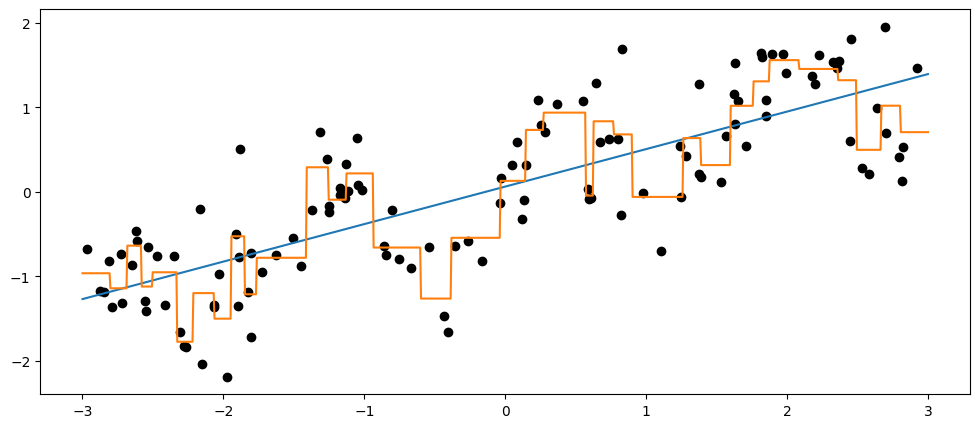

In [19]:
# 시각화
plt.figure(figsize = (12,5))
plt.scatter(X[:, 0], y, c='black')
plt.plot(line, linreg.predict(line), label='linear regression')
plt.plot(line, treereg.predict(line), label='tree regression')
plt.show()
# 이런 데이터로 모델을 만들것 임(바로 윗 셀을 생성해서 단순선형회귀로)

In [24]:
from sklearn.preprocessing import KBinsDiscretizer
# KBinsDiscretizer 연속적인 값을 불연속적으로 잘라 줌. N개의 그룹으로 분할하라는 것

# kb = KBinsDiscretizer(n_bins=10, strategy = "uniform")  # uniform: 모든 것이 같은 확률 
kb = KBinsDiscretizer(n_bins=10, strategy = "uniform", encode='onehot-dense')
kb.fit(X)

KBinsDiscretizer(encode='onehot-dense', n_bins=10, strategy='uniform')

In [ ]:
print(kb.bin_edges_)
# 어디서 나뉘었는가. bin_edges_ X를 똑같이 나눴음
# -2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173, -0.02277284,
# 0.56604605,  1.15486494,  1.74368384,  2.33250273, 2.92132162

# toarray: 각 데이터 포인트가 어느 급간에 속하는지 one-hot encodiing으로 반환
# print(kb.transform(X).toarray())

# kb = KBinsDiscretizer(n_bins=10, strategy = "uniform", encode='onehot-dense')
# 이렇게하면 스파스가 아닌 덴스라서, 아래처럼 toarray 안 해도 됨
print(kb.transform(X))

[array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


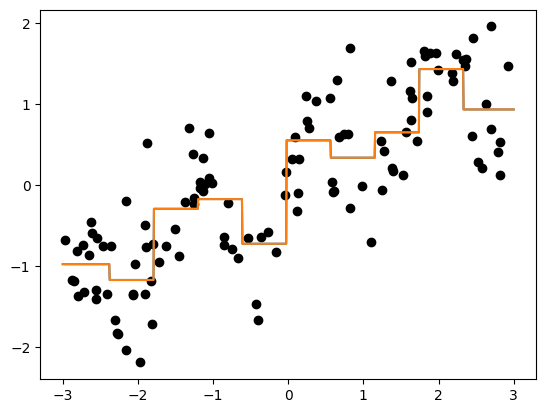

In [27]:
X_binned = kb.transform(X)          # X_train
line_binned = kb.transform(line)    # X_test

linreg2 = LinearRegression().fit(X_binned, y)
treereg2 = DecisionTreeRegressor(min_samples_leaf=3).fit(X_binned, y)

plt.scatter(X[:, 0], y, color='black')
plt.plot(line, linreg2.predict(line_binned), label = 'binned_lin_reg')
plt.plot(line, treereg2.predict(line_binned), label = 'binned_tree_reg')
plt.show()


In [36]:
X_combined.shape, line_combined.shape

((120, 11), (1000, 11))

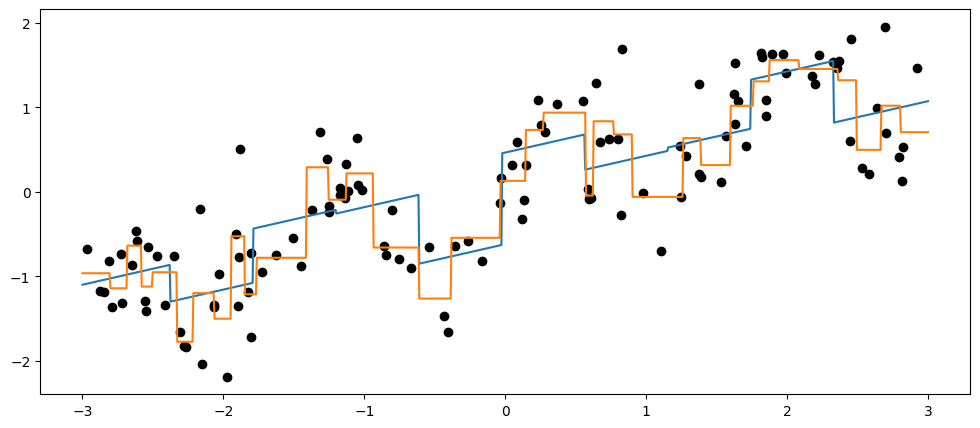

In [43]:
X_combined = np.hstack([X, X_binned])   # X는 기울기가 있고, X_binned는 기울기가 없다, X_combine은 기울기 효과를 보겠다는 것
line_combined = np.hstack([line, line_binned])

linreg3 = LinearRegression().fit(X_combined, y)
treereg3 = DecisionTreeRegressor(min_samples_leaf=3).fit(X_combined, y)

plt.figure(figsize=(12, 5))
plt.scatter(X[:, 0], y, color='black')
plt.plot(line, linreg3.predict(line_combined), label = 'binned_lin_reg')
plt.plot(line, treereg3.predict(line_combined), label = 'binned_tree_reg')
plt.show()

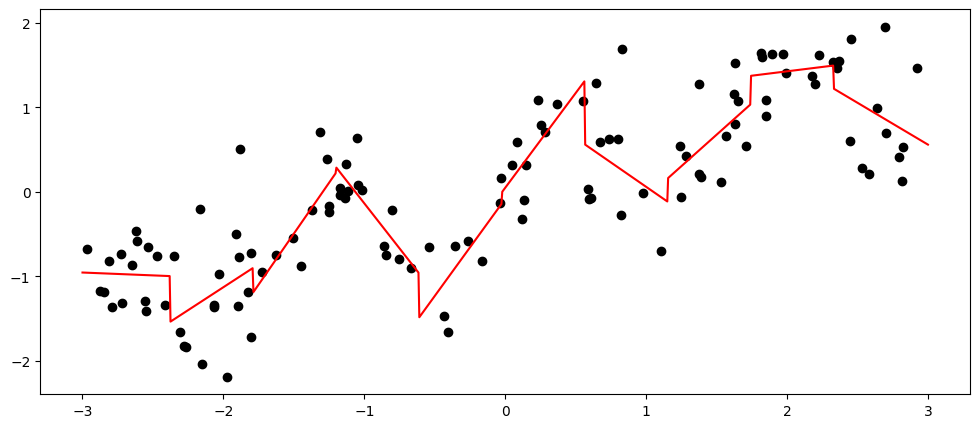

In [45]:
X_product = np.hstack([X_binned, X * X_binned])
line_product = np.hstack([line_binned, line * line_binned])

linreg4 = LinearRegression().fit(X_product, y)

plt.figure(figsize=(12, 5))
plt.scatter(X[:, 0], y, color='black')
plt.plot(line, linreg4.predict(line_product), label = 'binned_lin_reg', color='r')
plt.show()

In [46]:
print(X_combined.shape)

(120, 11)


In [47]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 10, include_bias=False)
X_poly = poly.fit_transform(X)

In [50]:
print(poly.get_feature_names_out())
print(X.shape, X_poly.shape)
X_poly

['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']
(120, 1) (120, 10)


array([[-7.52759287e-01,  5.66646544e-01, -4.26548448e-01, ...,
         1.03097700e-01, -7.76077513e-02,  5.84199555e-02],
       [ 2.70428584e+00,  7.31316190e+00,  1.97768801e+01, ...,
         2.86036036e+03,  7.73523202e+03,  2.09182784e+04],
       [ 1.39196365e+00,  1.93756281e+00,  2.69701700e+00, ...,
         1.40936394e+01,  1.96178338e+01,  2.73073115e+01],
       ...,
       [-1.88057965e+00,  3.53657981e+00, -6.65082000e+00, ...,
         1.56434973e+02, -2.94188426e+02,  5.53244767e+02],
       [ 2.35535399e+00,  5.54769242e+00,  1.30667795e+01, ...,
         9.47217033e+02,  2.23103142e+03,  5.25486876e+03],
       [ 2.36053451e-01,  5.57212320e-02,  1.31531891e-02, ...,
         9.64012886e-06,  2.27558569e-06,  5.37159857e-07]])

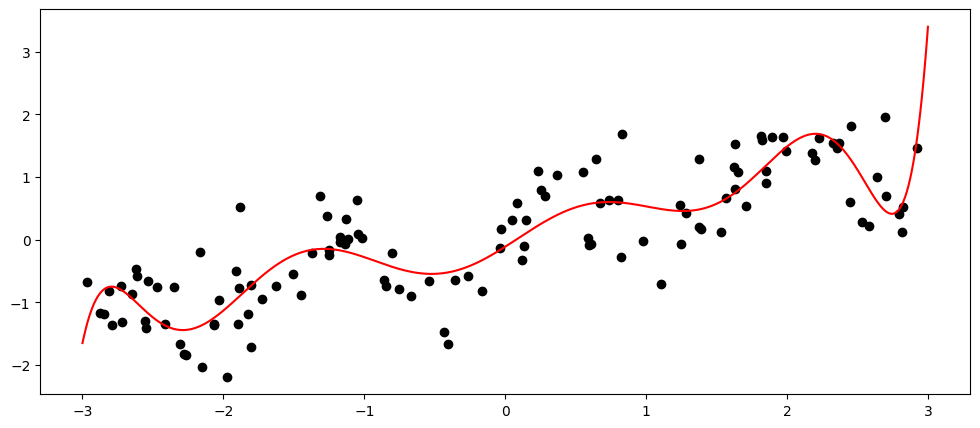

In [51]:
linreg5 = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)

plt.figure(figsize=(12, 5))
plt.scatter(X[:, 0], y, color='black')
plt.plot(line, linreg5.predict(line_poly), label = 'binned_lin_reg', color='r')
plt.show()

# 두번째 수업

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer_dataset = load_breast_cancer()
noise = np.random.RandomState(42).normal(size=(len(cancer_dataset.data), 50))   # 나쁜 속성 만들기(결과에 영향을 미치지 못하는 속성)

X_with_noise = np.hstack([cancer_dataset.data, noise])

print(cancer_dataset.data.shape, noise.shape, X_with_noise.shape)
# 본 데이터는 특성 30, 노이즈 특성 50, 둘 합쳐서 80

(569, 30) (569, 50) (569, 80)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_with_noise, cancer_dataset.target, 
                                                    random_state=42, stratify=cancer_dataset.target)

X_train2, X_test2, y_train2, y_test2 = train_test_split(cancer_dataset.data, cancer_dataset.target,
                                                        random_state=42, stratify=cancer_dataset.target)

In [13]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train, y_train)
print(logreg.score(X_train, y_train), logreg.score(X_test, y_test))

logreg2 = LogisticRegression(max_iter = 10000)
logreg2.fit(X_train2, y_train2)
print(logreg2.score(X_train2, y_train2), logreg2.score(X_test2, y_test2))

1.0 0.9370629370629371
0.9577464788732394 0.958041958041958


In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif

feature_selector = SelectPercentile(score_func=f_classif, percentile=40)
X_selected = feature_selector.fit_transform(X_with_noise, cancer_dataset.target)
print(X_selected.shape)

(569, 32)


In [15]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X_selected, cancer_dataset.target, random_state=42, stratify=cancer_dataset.target)

logreg3 = LogisticRegression(max_iter = 10000)
logreg3.fit(X_train3, y_train3)
print(logreg3.score(X_train3, y_train3), logreg3.score(X_test3, y_test3))

0.9577464788732394 0.965034965034965


In [19]:
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier

# feature_selector2 = SelectFromModel(
#     estimator=RandomForestClassifier(n_estimators=500, random_state=42), threshold="median")

feature_selector2 = RFE(
    estimator=RandomForestClassifier(n_estimators=500, random_state=42), 
    n_features_to_select=40)

X_selected2 = feature_selector2.fit_transform(X_with_noise, cancer_dataset.target)
print(X_selected2.shape)

(569, 40)


In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X_selected, cancer_dataset.target, random_state=42, stratify=cancer_dataset.target)

logreg4 = LogisticRegression(max_iter = 10000)
logreg4.fit(X_train3, y_train4)
print(logreg4.score(X_train4, y_train4), logreg4.score(X_test4, y_test4))
# SelectFromModel: 0.9577464788732394 0.965034965034965
# RFE: 0.9577464788732394 0.965034965034965

0.9577464788732394 0.965034965034965


In [21]:
feature_selector2.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False])